#theory

# Q1. What is deep learning, and how is it connected to artificial intelligence
# Answer: Deep learning is a subset of machine learning (itself a subset of artificial intelligence) that uses neural networks with many layers to model complex patterns in data. It mimics the way humans learn and is used for tasks like image recognition, NLP, and game playing.

# Q2. What is a neural network, and what are the different types of neural networks
# Answer: A neural network is a computational model inspired by the human brain. It consists of interconnected nodes (neurons) that process information. Types include Feedforward Neural Networks, Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), Generative Adversarial Networks (GANs), and Transformers.

# Q3. What is the mathematical structure of a neural network
# Answer: A neural network consists of layers of neurons, each performing a weighted sum of inputs plus bias, passed through an activation function. Mathematically: y = f(Wx + b), where W = weights, x = input, b = bias, and f = activation function.

# Q4. What is an activation function, and why is it essential in neural network
# Answer: An activation function introduces non-linearity into the network, allowing it to learn complex patterns. Without it, the network would be limited to learning only linear relationships.

# Q5. Could you list some common activation functions used in neural networks
# Answer: Common activation functions include ReLU (Rectified Linear Unit), Sigmoid, Tanh, Leaky ReLU, Softmax, and GELU.

# Q6. What is a multilayer neural network
# Answer: A multilayer neural network (also called a multilayer perceptron or MLP) has multiple layers: an input layer, one or more hidden layers, and an output layer. The hidden layers allow it to learn hierarchical representations.

# Q7. What is a loss function, and why is it crucial for neural network training
# Answer: A loss function measures the difference between the network’s predictions and the true values. It guides learning by quantifying the error to be minimized during training.

# Q8. What are some common types of loss functions
# Answer: Common loss functions include Mean Squared Error (MSE) for regression, Cross-Entropy Loss for classification, Hinge Loss for SVMs, and Categorical Cross-Entropy for multi-class classification.

# Q9. How does a neural network learn
# Answer: A neural network learns by adjusting its weights to minimize the loss function. This is typically done using gradient descent and backpropagation, which computes gradients of the loss with respect to weights.

# Q10. What is an optimizer in neural networks, and why is it necessary
# Answer: An optimizer is an algorithm that updates the network’s weights to minimize the loss function. It’s necessary to efficiently navigate the error surface and reach good solutions.

# Q11. Could you briefly describe some common optimizers
# Answer: Common optimizers include Stochastic Gradient Descent (SGD), Adam, RMSProp, Adagrad, and Momentum. They vary in how they adjust learning rates and use gradients to improve convergence.

# Q12. Can you explain forward and backward propagation in a neural network
# Answer: Forward propagation computes outputs from inputs by applying weights and activation functions layer by layer. Backward propagation calculates gradients of the loss with respect to weights using the chain rule and updates the weights to reduce the loss.

# Q13. What is weight initialization, and how does it impact training
# Answer: Weight initialization is the process of setting initial weights before training. Good initialization helps the network converge faster and avoid issues like vanishing/exploding gradients.

# Q14. What is the vanishing gradient problem in deep learning
# Answer: The vanishing gradient problem occurs when gradients become very small as they are backpropagated through many layers, making learning slow or impossible for earlier layers.

# Q15. What is the exploding gradient problem?
# Answer: The exploding gradient problem happens when gradients become excessively large during backpropagation, causing unstable updates and potentially diverging weights.


#Practical

In [5]:
# Q1: How do you create a simple perceptron for basic binary classification

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

model = Sequential([
    Input(shape=(2,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)

loss, acc = model.evaluate(X, y, verbose=0)
print(f"Accuracy: {acc * 100:.2f}%")

predictions = model.predict(X)
print("Predictions:")
print(np.round(predictions))


Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predictions:
[[0.]
 [0.]
 [1.]
 [1.]]


In [7]:
# Q2: How can you build a neural network with one hidden layer using Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(4,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Q3: How do you initialize weights using the Xavier (Glorot) initialization method in Keras

from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

initializer = GlorotUniform()

model = Sequential([
    Input(shape=(4,)),
    Dense(8, activation='relu', kernel_initializer=initializer)
])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Q4: How can you apply different activation functions in a neural network in Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(10,)),
    Dense(16, activation='tanh'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Q5: How do you add dropout to a neural network model to prevent overfitting

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model = Sequential([
    Input(shape=(20,)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Q6: How do you manually implement forward propagation in a simple neural network

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example weights and bias
weights = np.array([0.5, -0.5])
bias = 0.1

# Input
x = np.array([1.0, 2.0])

# Forward pass
z = np.dot(weights, x) + bias
output = sigmoid(z)

print("Output:", output)


Output: 0.401312339887548


In [15]:
# Q6: How do you manually implement forward propagation in a simple neural network

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example weights and bias
weights = np.array([0.5, -0.5])
bias = 0.1

# Input
x = np.array([1.0, 2.0])

# Forward pass
z = np.dot(weights, x) + bias
output = sigmoid(z)

print("Output:", output)


Output: 0.401312339887548


In [14]:
# Q7: How do you add batch normalization to a neural network model in Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization

model = Sequential([
    Input(shape=(20,)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 128 (512.00 B)

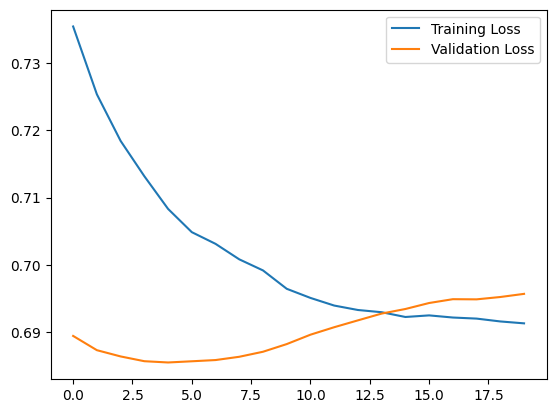

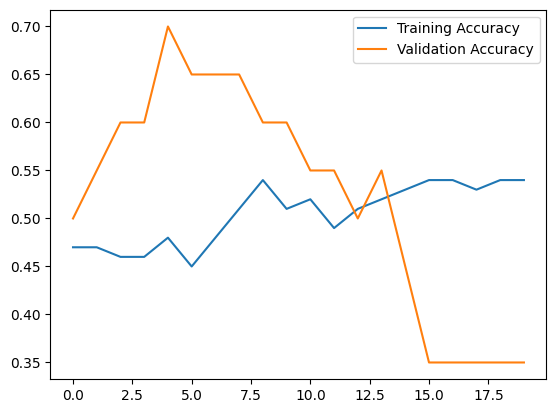

In [13]:
# Q8: How can you visualize the training process with accuracy and loss curves

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Example dummy data
X_train = np.random.rand(100, 10)
y_train = np.random.randint(0, 2, size=(100,))
X_val = np.random.rand(20, 10)
y_val = np.random.randint(0, 2, size=(20,))

model = Sequential([
    Input(shape=(10,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=0)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [21]:
# Q9: How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Dummy data
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, size=(100,))

# Model
model = Sequential([
    Input(shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Gradient clipping using clipnorm
optimizer = Adam(learning_rate=0.01, clipnorm=1.0)

# Compile and train
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=10, verbose=1)

# Evaluate
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Accuracy: {acc * 100:.2f}%")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5142 - loss: 0.6920  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5330 - loss: 0.6910 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5681 - loss: 0.6756 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6560 - loss: 0.6685 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5493 - loss: 0.6856 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5285 - loss: 0.6922 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6268 - loss: 0.6754 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6536 - loss: 0.6650 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6567 - loss: 0.6584 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6355 - loss: 0.6550 
Accuracy: 63.00%


In [22]:
# Q10: How can you create a custom loss function in Keras

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Dummy data
X = np.random.rand(100, 5)
y = np.random.rand(100, 1)

# Custom MSE Loss
def custom_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Model
model = Sequential([
    Input(shape=(5,)),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile with custom loss
model.compile(optimizer='adam', loss=custom_mse, metrics=['mae'])

# Train
history = model.fit(X, y, epochs=10, verbose=1)

# Evaluate
loss, mae = model.evaluate(X, y, verbose=0)
print(f"MAE: {mae:.4f}")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1336 - mae: 0.3056  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1194 - mae: 0.2921 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1250 - mae: 0.2976 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1067 - mae: 0.2785 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0998 - mae: 0.2649 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1073 - mae: 0.2782 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1054 - mae: 0.2759 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0933 - mae: 0.2565 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1035 - mae: 0.2725 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1084 - mae: 0.2785 
MAE: 0.2718


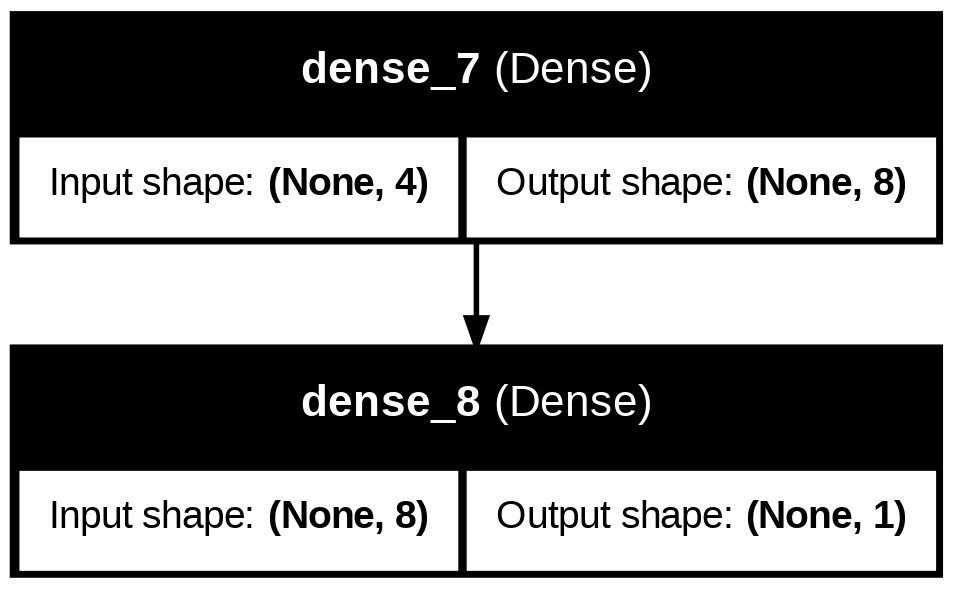

In [8]:
# Q11: How can you visualize the structure of a neural network model in Keras

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)
